
# Task 3: Linear Regression

In [390]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Loading & split features and target

In [391]:
df = pd.read_csv("housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [392]:
X = df.drop("price", axis=1)
y = df["price"]

## Data Preprocessing

In [393]:
# Encode binary categorical variables
le = LabelEncoder()
cols = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]
for col in cols:
    X[col] = le.fit_transform(X[col])

X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [394]:
# One-hot encode multi-category column
X = pd.get_dummies(X, columns=['furnishingstatus'])
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,1,0,0,0,1,2,1,True,False,False
1,8960,4,4,4,1,0,0,0,1,3,0,True,False,False
2,9960,3,2,2,1,0,1,0,0,2,1,False,True,False
3,7500,4,2,2,1,0,1,0,1,3,1,True,False,False
4,7420,4,1,2,1,1,1,0,1,2,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,False,False,True
541,2400,3,1,1,0,0,0,0,0,0,0,False,True,False
542,3620,2,1,1,1,0,0,0,0,0,0,False,False,True
543,2910,3,1,1,0,0,0,0,0,0,0,True,False,False


In [395]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## MODEL 1: LINEAR REGRESSION ON UNSCALED DATA

In [396]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [397]:
y_pred = model.predict(X_test)

print("Evaluation on Unscaled Data:\n")

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Evaluation on Unscaled Data:

MAE: 970043.403920164
MSE: 1754318687330.663
RMSE: 1324506.9600914384
R² Score: 0.6529242642153186


In [398]:
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
print("\nUnscaled Coefficients:\n", coeff_df)



Unscaled Coefficients:
                             Feature   Coefficient
0                              area  2.359688e+02
1                          bedrooms  7.677870e+04
2                         bathrooms  1.094445e+06
3                           stories  4.074766e+05
4                          mainroad  3.679199e+05
5                         guestroom  2.316100e+05
6                          basement  3.902512e+05
7                   hotwaterheating  6.846499e+05
8                   airconditioning  7.914267e+05
9                           parking  2.248419e+05
10                         prefarea  6.298906e+05
11       furnishingstatus_furnished  1.801756e+05
12  furnishingstatus_semi-furnished  5.329381e+04
13     furnishingstatus_unfurnished -2.334694e+05


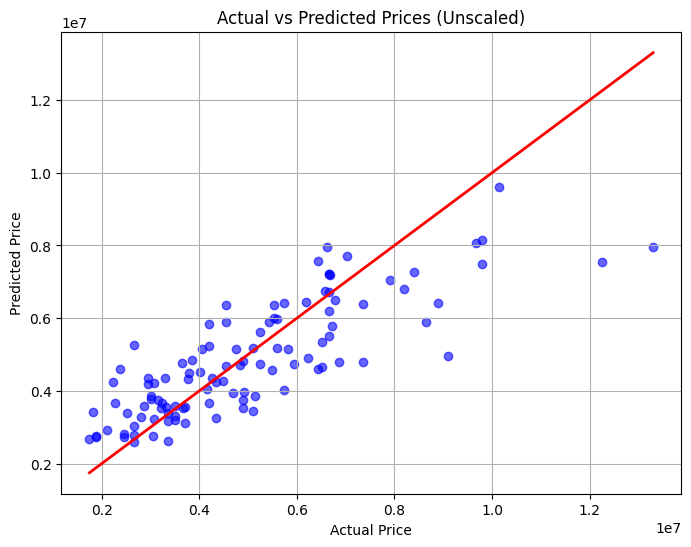

In [399]:
# Actual vs Predicted Plot

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (Unscaled)")
plt.grid(True)
plt.show()

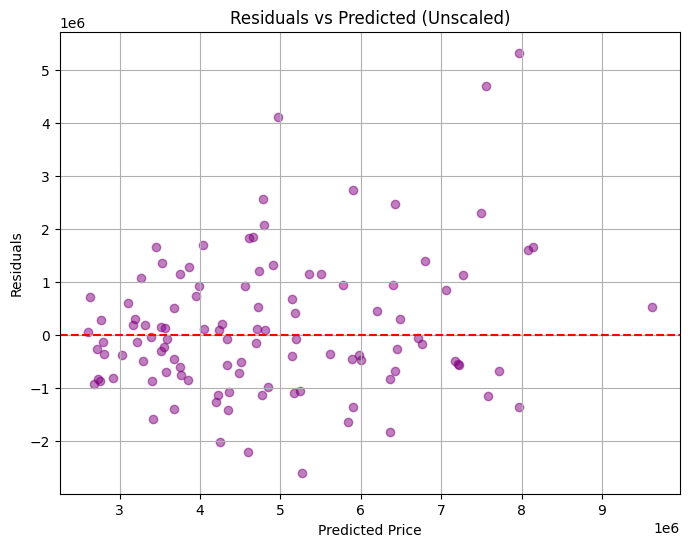

In [400]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='purple', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Unscaled)")
plt.grid(True)
plt.show()

C:\Users\Balaji\AppData\Local\Temp\ipykernel_21472\3888091980.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coeff_df_sorted, palette='coolwarm')


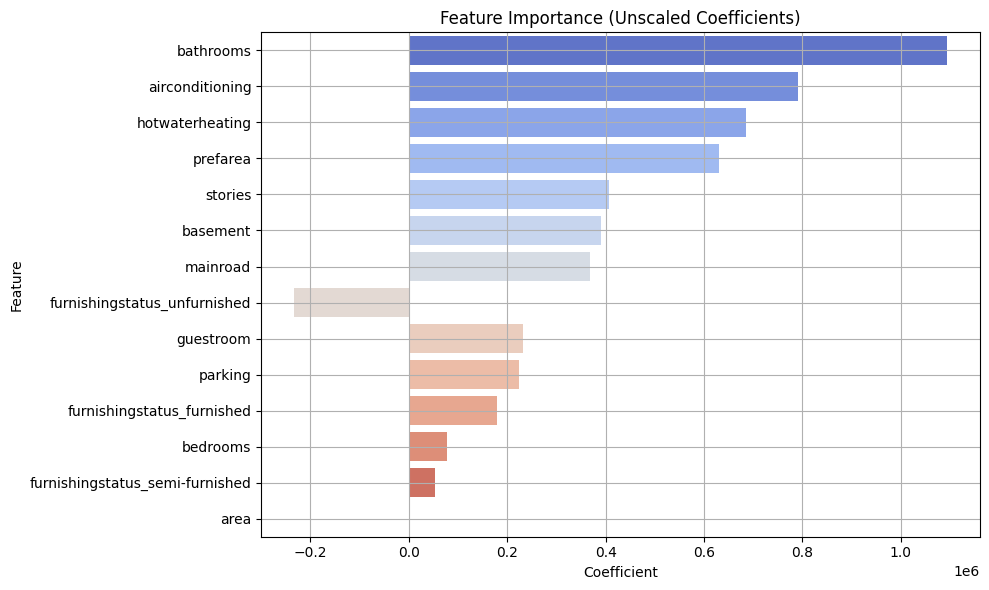

In [401]:
coeff_df_sorted = coeff_df.sort_values(by='Coefficient', key=abs, ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df_sorted, palette='coolwarm')
plt.title("Feature Importance (Unscaled Coefficients)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [402]:
## MODEL 2: LINEAR REGRESSION ON SCALED DATA

In [403]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [404]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [405]:
y_pred_scaled = model.predict(X_test_scaled)

print("Evaluation on Scaled Data:\n")

print("MAE:", mean_absolute_error(y_test, y_pred_scaled))
print("MSE:", mean_squared_error(y_test, y_pred_scaled))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_scaled)))
print("R² Score:", r2_score(y_test, y_pred_scaled))

Evaluation on Scaled Data:

MAE: 970043.4039201644
MSE: 1754318687330.668
RMSE: 1324506.9600914402
R² Score: 0.6529242642153176


In [406]:
coeff_df_scaled = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)
print("\nScaled Coefficients:\n", coeff_df_scaled)


Scaled Coefficients:
                             Feature    Coefficient
2                         bathrooms  521879.027748
0                              area  519552.416340
8                   airconditioning  365157.393851
3                           stories  349251.438906
10                         prefarea  266656.351993
9                           parking  192005.953667
6                          basement  187067.803214
7                   hotwaterheating  149862.702991
4                          mainroad  128498.628215
13     furnishingstatus_unfurnished -106204.104713
5                         guestroom   88768.667686
11       furnishingstatus_furnished   80529.382918
1                          bedrooms   57349.559419
12  furnishingstatus_semi-furnished   28712.175946


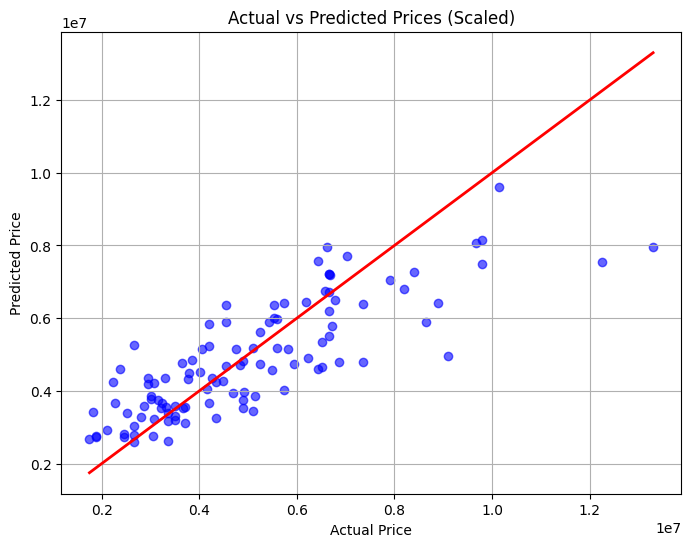

In [407]:
# Actual vs Predicted Plot (Scaled)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_scaled, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (Scaled)")
plt.grid(True)
plt.show()

C:\Users\Balaji\AppData\Local\Temp\ipykernel_21472\1879895544.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coeff_df_scaled, palette='coolwarm')


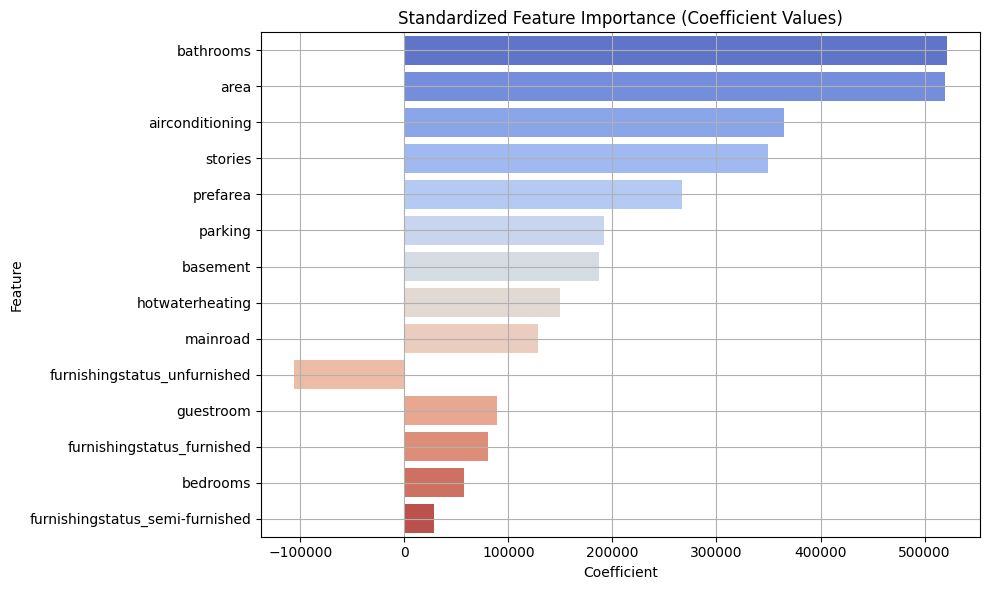

In [408]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df_scaled, palette='coolwarm')
plt.title("Standardized Feature Importance (Coefficient Values)")
plt.grid(True)
plt.tight_layout()
plt.show()